# LlamaIndex

这是托管在https://github.com/SamurAIGPT/LlamaIndex-course 的LlamaIndex课程的第一课。

在课程中，我们将了解LlamaIndex的基础知识，数据连接器，索引是什么，检索器，查询引擎，最终使用LlamaIndex构建项目。

### LlamaIndex的作用是什么？

ChatGPT是在大量数据上训练的。但如果您希望在私有数据上训练ChatGPT怎么办？有3种方法可以实现这一目标：

1. 在您的数据上训练像Llama这样的开源LLM。这是一个复杂且耗时的过程，不具备可扩展性。
2. 将所有文档作为提示传递给LLM。这种方法存在限制，因为上下文窗口大小受限。
3. 仅获取并将相关文档作为输入传递给您的LLM。

LlamaIndex使用第三种方法工作，我们将通过示例学习如何实现这一点。索引等涉及的一些概念将在接下来的课程中更详细地介绍。

### 在您的文档上训练ChatGPT

以下是一个简单示例，演示如何在您的文档上训练ChatGPT

### 安装LlamaIndex和依赖项

In [ ]:
!pip install llama_index

### 下载用于训练的数据。我们使用国情咨文文本文件来训练ChatGPT

In [2]:
!wget https://raw.githubusercontent.com/hwchase17/chat-your-data/master/state_of_the_union.txt
!mkdir data
!mv state_of_the_union.txt data/

### 使用LlamaIndex训练聊天机器人

现在进入主要部分。我们将使用LlamaIndex在我们的私有数据上训练ChatGPT。这里提到的一些概念，如VectorStoreIndex，将在接下来的课程中详细解释。

我们正在使用LlamaIndex中的SimpleDirectoryReader从上面下载的文件中读取数据。这个读取器可以从目录中的所有文件中读取数据，并将其转换为可以训练的文档格式。

在"YOUR KEY"的位置放入您的openai密钥

In [ ]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader
import openai
openai.api_key = "YOUR KEY"
documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)

现在我们创建一个名为query engine的LlamaIndex接口来查询我们的文档。这将在接下来的课程中更详细地解释。

有了这个，您现在可以使用自然语言查询您的数据了。

In [18]:
query_engine = index.as_query_engine()
response = query_engine.query("What is NATO?")
print(response)


NATO is the North Atlantic Treaty Organization, an intergovernmental military alliance between 29 North American and European countries. It was created to secure peace and stability in Europe after World War 2.


# LlamaIndex基础知识

在本课程中，我们将讨论LlamaIndex的基础知识及其核心组件

本课程将讨论以下内容：

1. 节点（Nodes）
2. 文档加载器（Document loaders）
3. 索引（Indexes）
4. 检索器（Retrievers）
5. 查询引擎（Query Engines）

### 节点（Nodes）

节点是LlamaIndex的基本单元。节点实际上就是一个包含一段文本的数据结构。

每当您提供一个文档时，您可以将其拆分为多个块并存储在节点中。

### 文档加载器（Document Loader）

LlamaIndex中的文档加载器是一个用于从源中提取数据的接口。源可以是网页、YouTube视频、PDF等。

LlamaIndex支持多种文档加载器，我们将研究其中一些以适应我们的用例。

### 索引（Indexes）

LlamaIndex中的索引是一种组织和存储来自各种数据源的信息的数据结构，使搜索变得更加容易。索引是建立在一组节点之上的。

LlamaIndex提供了不同类型的索引，我们将在后续课程中学习。

### 检索器（Retrievers）

LlamaIndex中的检索器帮助根据给定的查询从索引中获取一组节点。它类似于一个搜索工具，从大型数据集中找到相关信息以回答您的问题。

LlamaIndex中有不同类型的检索器，我们将在后续课程中学习。

### 查询引擎（Query Engines）

LlamaIndex中的查询引擎处理用户输入的查询，与底层数据结构（如索引）交互，并返回一个综合的响应。

LlamaIndex提供了不同类型的查询引擎，我们将在后续课程中学习。

让我们通过一个示例来理解所有这些概念。

### 安装LlamaIndex和依赖项


In [ ]:
!pip install llama_index langchain

### 下载用于训练的数据。我们使用国情咨文文本文件来训练ChatGPT


In [ ]:
!wget https://raw.githubusercontent.com/hwchase17/chat-your-data/master/state_of_the_union.txt
!mkdir data
!mv state_of_the_union.txt data/

### 将输入文本加载到LlamaIndex输入中。我们可以使用一个简单的文档加载器来实现这一点，就像我们之前讨论过的那样。

我们将使用SimpleDirectoryReader

In [ ]:
from llama_index import SimpleDirectoryReader

documents = SimpleDirectoryReader('./data').load_data()

### 将数据拆分为节点。

正如我们讨论过的，节点是保存输入的基本数据结构。我们将使用以下代码将上面加载的输入拆分为多个节点。

In [ ]:
from llama_index.node_parser import SimpleNodeParser
parser = SimpleNodeParser()
nodes = parser.get_nodes_from_documents(documents)

### 创建索引

现在我们已经创建了节点，我们可以在其基础上创建一个索引。我们将使用VectorStoreIndex，它从节点中的所有文本创建嵌入并将其存储在向量数据库中。有关嵌入的更多细节将在第一课中分享。

In [ ]:
from llama_index import LLMPredictor, VectorStoreIndex
from langchain import OpenAI
os.environ["OPENAI_API_KEY"] = "api-key"

index = VectorStoreIndex(nodes)

### 创建检索器

我们将使用VectorIndexRetriever，根据相似性检索前k个匹配文档。在这个示例中，我们将保持k=2。

In [ ]:
from llama_index.retrievers import VectorIndexRetriever

retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=2,
)

### 创建查询引擎

现在我们可以在检索器上构建一个查询引擎，开始进行查询。

In [ ]:
from llama_index.query_engine import RetrieverQueryEngine

query_engine = RetrieverQueryEngine(
    retriever=retriever
)

### 现在进行一个查询

In [ ]:
response = query_engine.query("What did the author do growing up?")
print(response)


The author grew up in a family where they had to adjust to the rising cost of food, gas, housing, and other expenses. They experienced the struggles of their father leaving home to find work.


# 索引

LlamaIndex中的索引是一种数据结构，它组织和存储来自各种数据源的信息，使搜索变得更加容易。索引是建立在一组节点之上的。

### 节点

节点是LlamaIndex的基本单元。节点实际上就是一个包含一段文本的数据结构。

每当您提供一个文档时，您可以将其拆分为多个块并存储在节点中。

### 索引类型

LlamaIndex提供了不同类型的索引，我们现在将学习这些索引

### 列表索引

列表索引将节点存储为类似链表数据结构的顺序链。默认情况下，它从所有节点获取数据并将其作为响应的一部分发送。

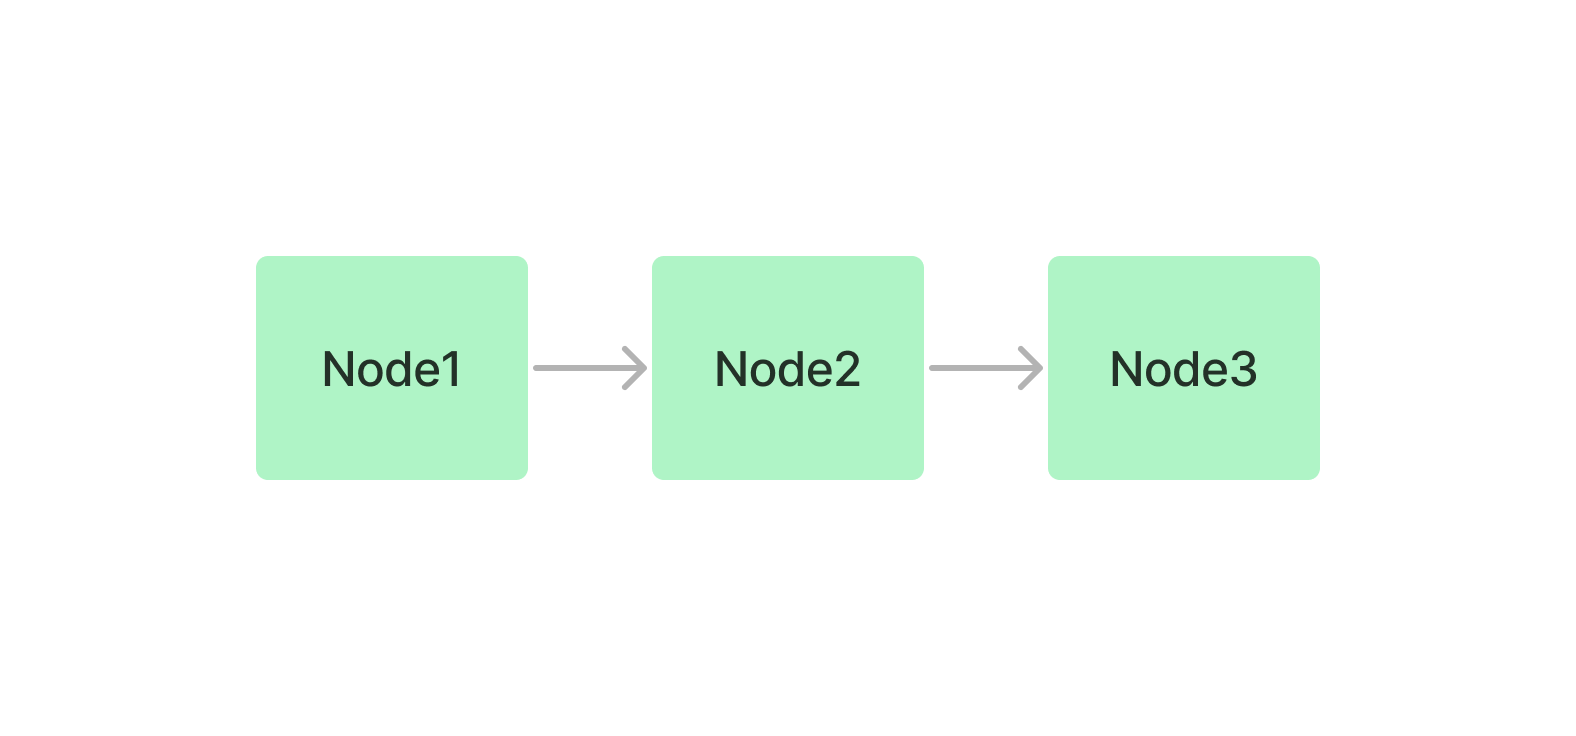

### 向量存储索引

向量存储索引将每个节点及其对应的嵌入存储在向量存储中。在查询向量索引时，它始终为您提供与我们的查询相关的前k个最相似的节点。

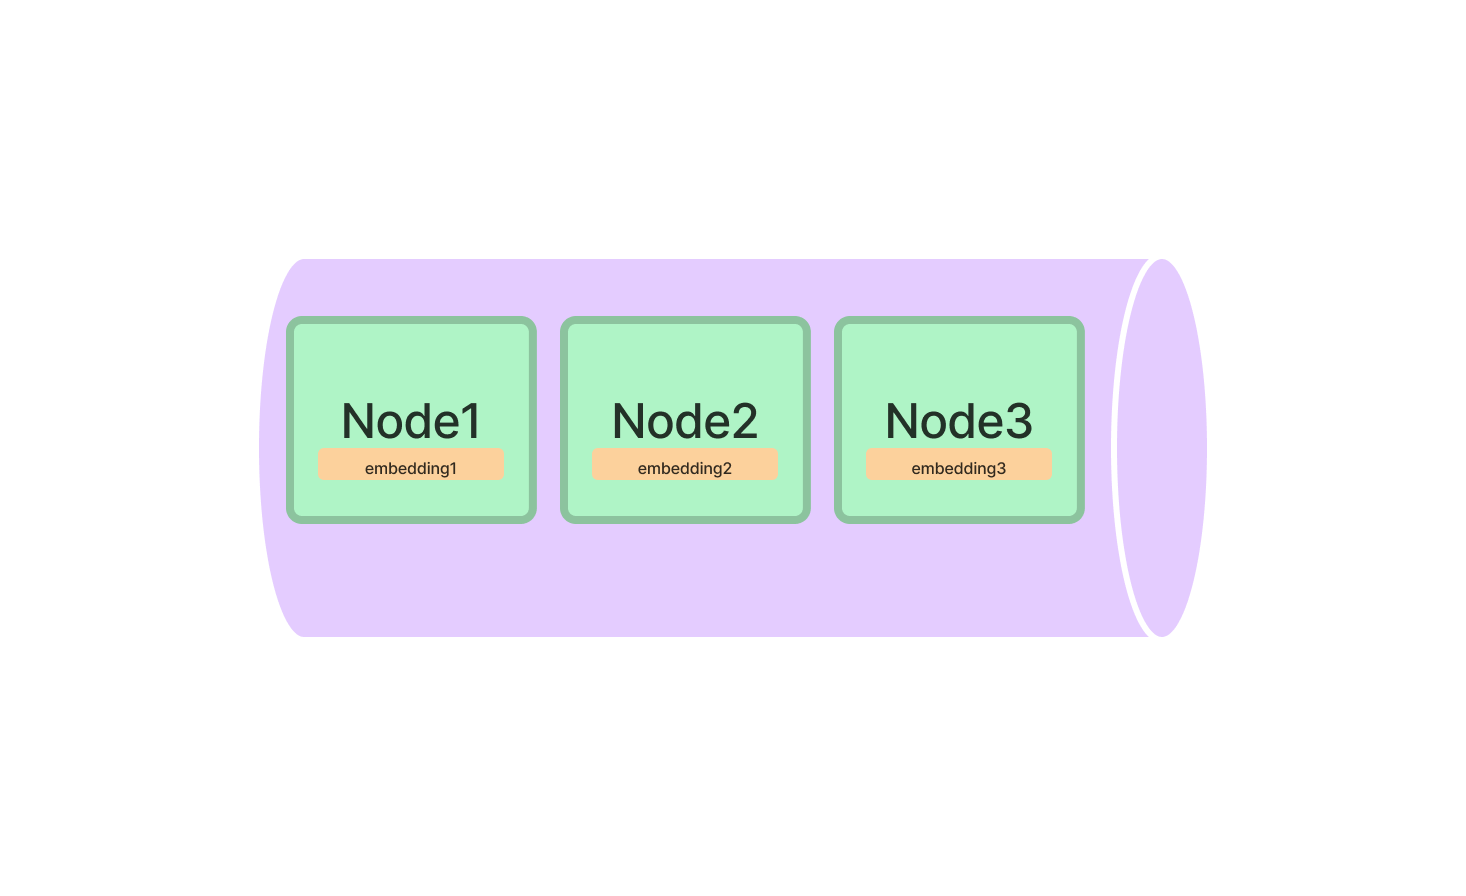

### 树索引

树索引从一组节点构建一个分层树。

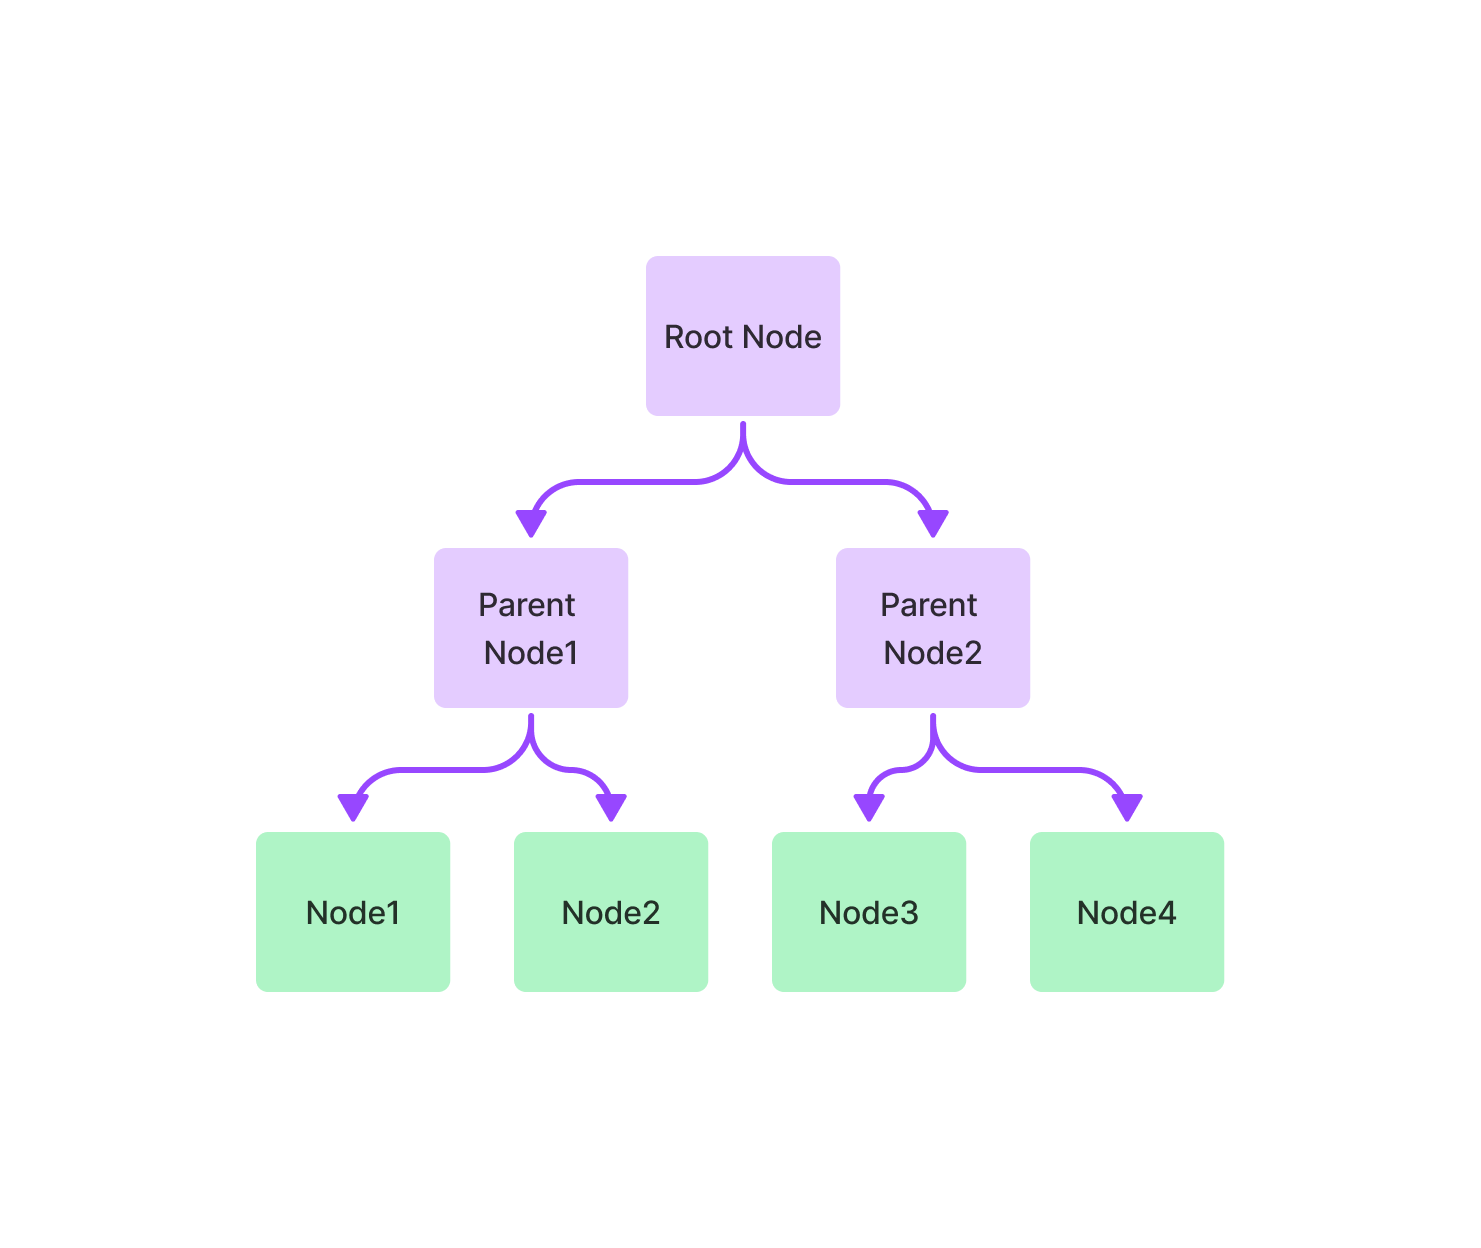


查询树索引涉及从根节点到叶节点的遍历。默认情况下（child_branch_factor=1），查询在给定父节点的情况下选择一个子节点。如果child_branch_factor=2，则查询每个级别选择两个子节点。

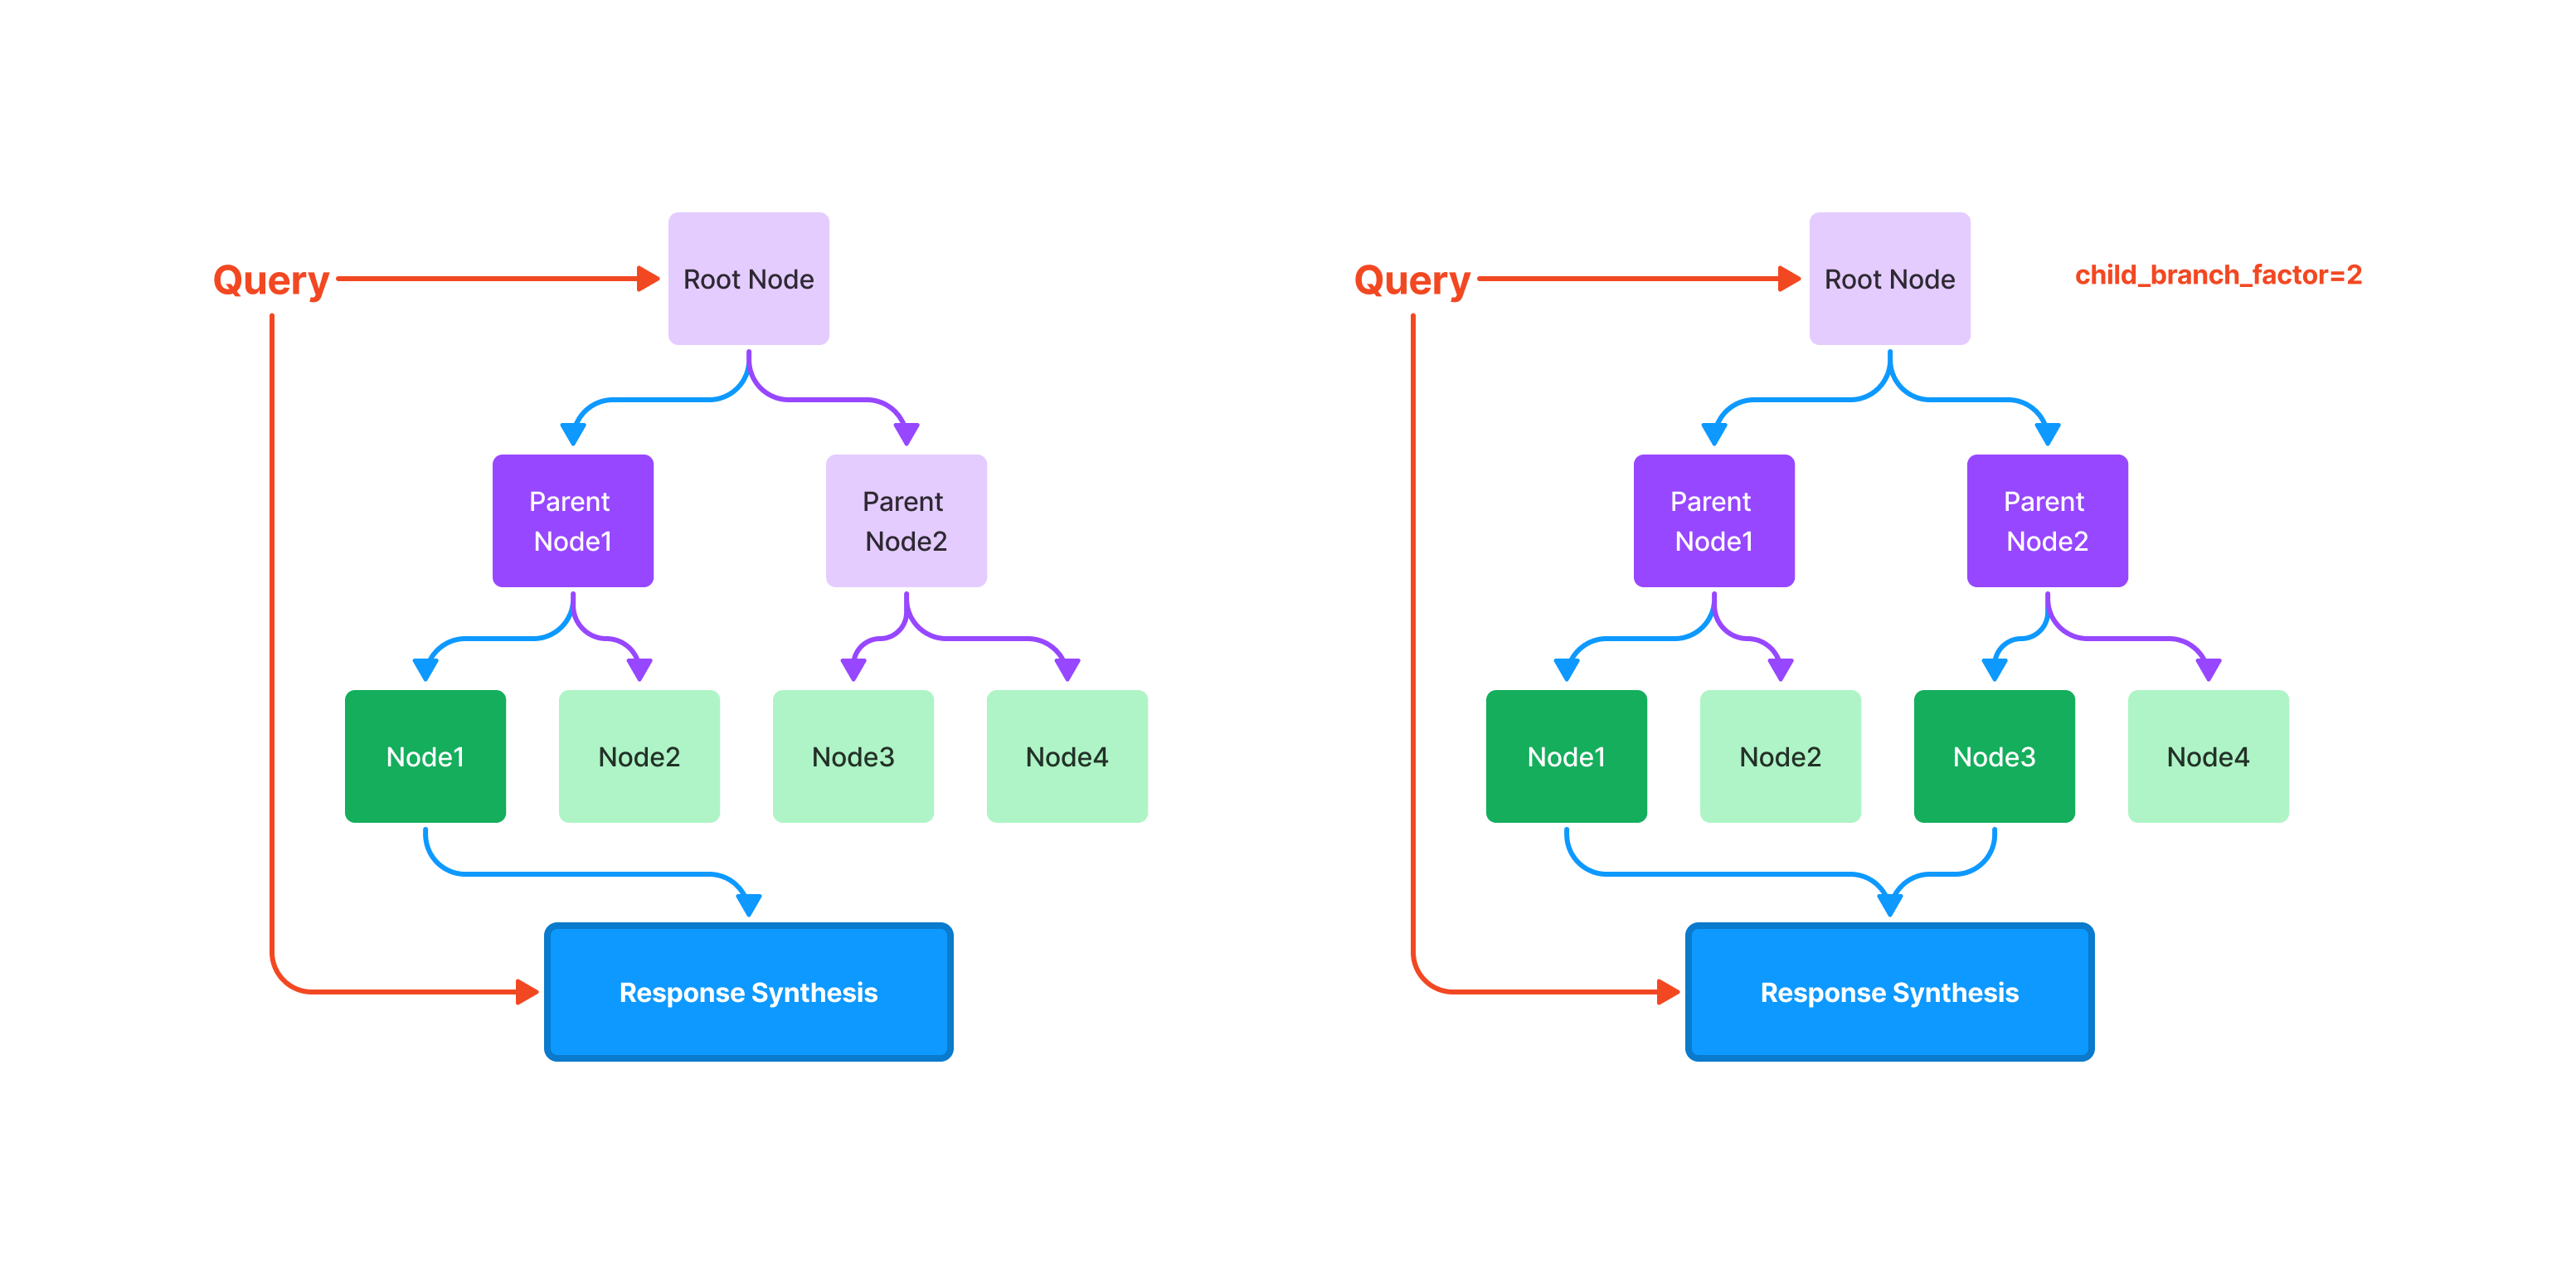

### 关键词表索引


GPTKeywordTableIndex实现从索引节点中提取关键词，并使用它们来查找相关文档。当我们提出问题时，首先实现会从问题中生成关键词。接下来，索引搜索相关文档并将它们发送给LLM。

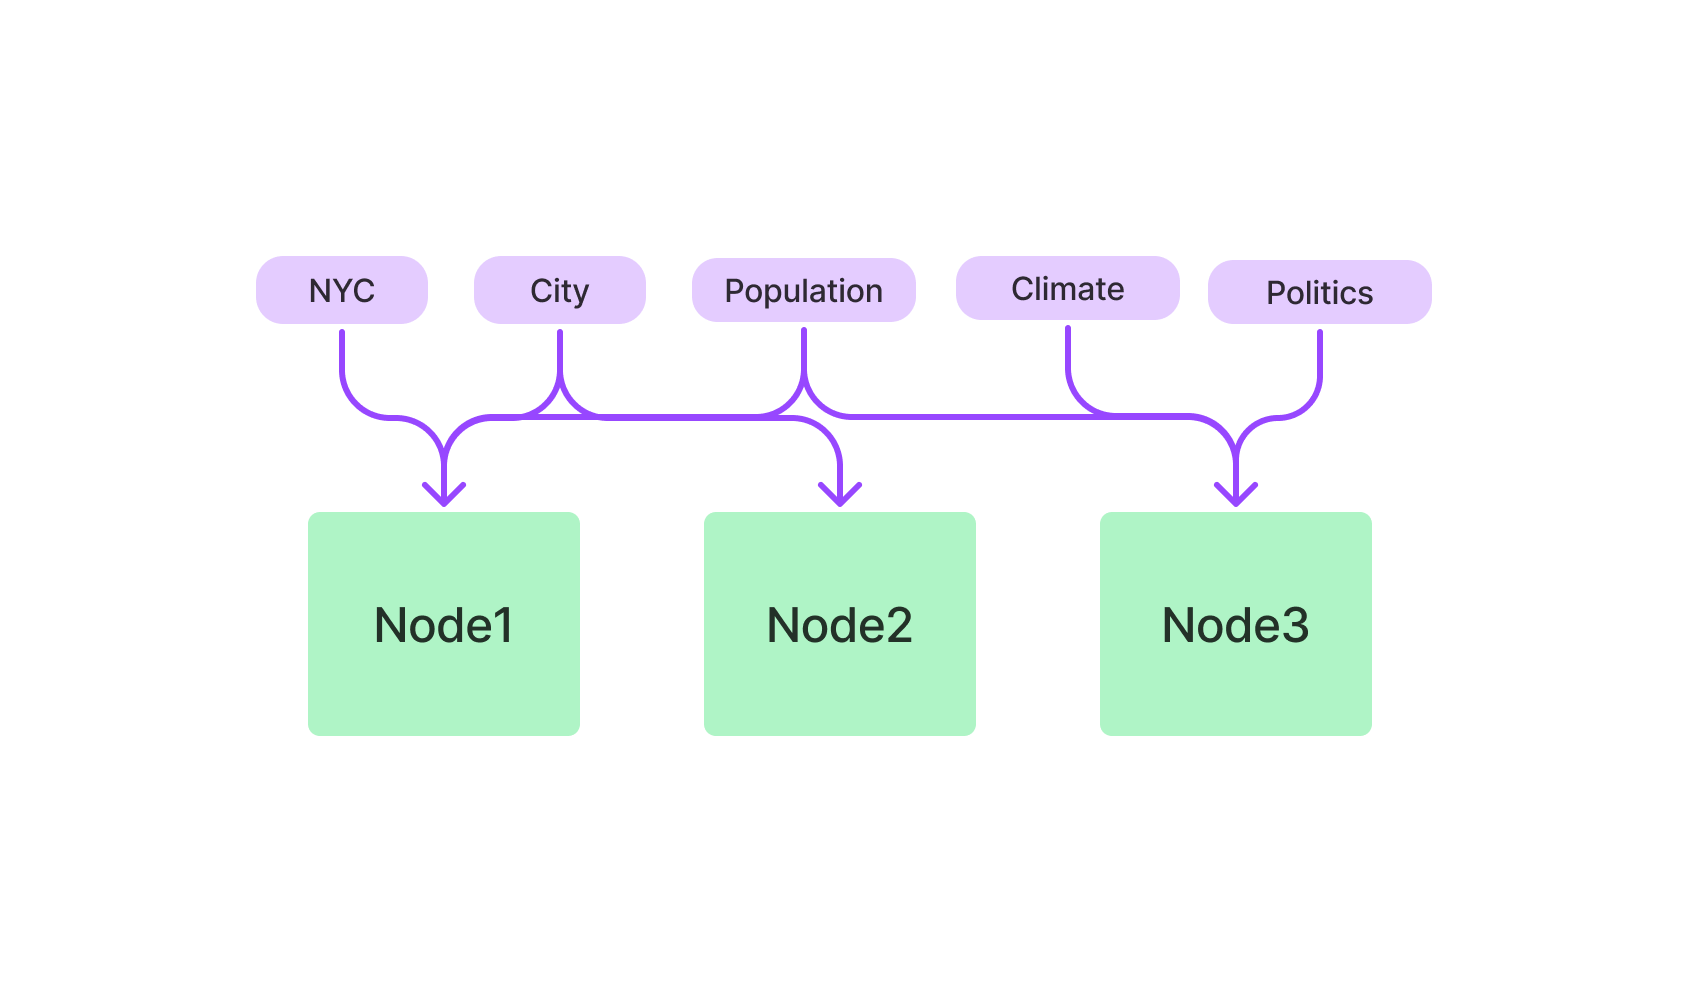


## 何时使用特定索引

### 列表索引

当您没有太多文档时，列表索引是完美的选择。与尝试查找相关数据不同，索引会将所有块连接起来并将它们全部发送给LLM。如果生成的文本太长，索引会拆分文本并要求LLM优化答案。

当与'embedding'参数一起使用时，列表索引与VectorStoreIndex非常相似，区别在于列表索引发送所有匹配节点而无需任何阈值，而vectorstoreindex仅在匹配特定阈值时发送节点。

### 向量存储索引

向量存储索引可用于获取通过特定匹配分数阈值的前K个相关文档。

### 树索引

树索引在处理基于摘要的任务时非常有用。

### 关键词表索引

在关键词表索引中，每个节点都会发送到LLM以生成关键词。将每个文档发送到LLM会大幅增加索引成本。它比其他索引更慢、更昂贵。因此，除非使用此索引提供的结果比其他索引好得多（这并不一定是情况），否则不建议使用。

# 数据连接器

LlamaIndex中的数据连接器负责从不同来源获取数据并将数据转换为文档格式，以便LlamaIndex可以摄取。

LlamaIndex支持一系列数据连接器，可帮助您从网页、PDF、YouTube视频、Notion文档、Slack消息、Google文档等读取数据。

让我们通过一个示例讨论其中的一些。

In [ ]:
!pip install llama-index openai

### YouTube文档加载器

让我们看看如何将YouTube视频的转录转换为文档格式

In [24]:
from llama_index import download_loader

YoutubeTranscriptReader = download_loader("YoutubeTranscriptReader")

loader = YoutubeTranscriptReader()
youtube_documents = loader.load_data(ytlinks=['https://www.youtube.com/watch?v=nHcbHdgVUJg&ab_channel=WintWealth'])

### PDF加载器

下载PDF文件

In [ ]:
!wget https://www.africau.edu/images/default/sample.pdf

现在将其转换为文档格式

In [26]:
from pathlib import Path
from llama_index import download_loader

PDFReader = download_loader("PDFReader")

loader = PDFReader()

pdf_document = loader.load_data(file=Path('./sample.pdf'))

### Notion加载器

In [27]:
from llama_index import download_loader
import os

NotionPageReader = download_loader('NotionPageReader')

integration_token = "your-notion-token"
database_id = "your-database-id"
reader = NotionPageReader(integration_token=integration_token)
notion_documents = reader.load_data(database_id=database_id)

In [28]:
all_documents = youtube_documents + pdf_document + notion_documents

现在让我们在这些文档上创建一个问答机器人

In [30]:
import os
from llama_index import VectorStoreIndex
os.environ["OPENAI_API_KEY"] = "your-key"
index = VectorStoreIndex.from_documents(all_documents)

In [31]:
query_engine = index.as_query_engine()
response = query_engine.query("Does IIT help?")
print(response)


Yes, IIT can help in certain situations. For example, having an IIT degree can give a founder access to a larger network of investors and potential partners. It can also give them more credibility when pitching their startup. However, it is not a guarantee of success and there are many successful founders who do not have an IIT degree. Ultimately, it is up to the individual to prove themselves and their abilities.


In [ ]:
!pip install llama-index

# 检索器

在LlamaIndex中，检索器负责根据用户查询获取最相关的上下文。检索器建立在索引之上，指定如何从索引中提取节点。我们在前一课中已经讨论了索引。

LlamaIndex支持许多类型的检索器，包括以下内容：

**向量存储检索器**

向量存储检索器从向量存储索引中提取前k个最相似的节点。这里模式没有重要性。

**列表检索器**

您可以使用列表检索器从列表索引中提取所有节点。此检索器支持两种模式：默认模式和嵌入模式。

默认模式提取所有节点，而嵌入模式使用嵌入提取前k个节点。

**树检索器**

正如其名称所示，树检索器从节点的分层树中提取节点。此检索器支持许多不同的模式，默认模式是select_leaf。

**关键词表检索器**

关键词表检索器从查询中提取关键词，并使用这些关键词查找具有匹配关键词的节点。

该检索器支持三种不同的模式：默认、简单和rake。

**知识图检索器**

知识图检索器从节点的分层树中提取节点。

它支持关键词、嵌入和混合模式。混合模式同时使用关键词和嵌入查找相关三元组。

这里是一个基于列表索引构建的检索器的代码示例

In [6]:
from llama_index import ListIndex
from llama_index import download_loader

YoutubeTranscriptReader = download_loader("YoutubeTranscriptReader")

loader = YoutubeTranscriptReader()
docs = loader.load_data(ytlinks=['https://www.youtube.com/watch?v=nHcbHdgVUJg&ab_channel=WintWealth'])
list_index = ListIndex(docs)
retriever = list_index.as_retriever(
    retriever_mode='embedding',
)

# 节点后处理器

LlamaIndex中的节点后处理器接受一组节点，并在返回它们之前应用转换或过滤。

节点后处理器通常在查询引擎中使用，在检索步骤之后和响应合成步骤之前。

例如，您可以要求检索到的节点中不存在或存在特定关键字。您还可以根据时间等属性对结果进行排名。

有许多类型的后处理器，让我们讨论其中一些：

**SimilarityPostprocessor**

允许您要求检索到的节点具有最小相似度分数。

**KeywordNodePostprocessor**

允许您要求节点中存在特定关键字。

**TimeWeightedPostprocessor**

TimeWeightedPostprocessor根据最近性对节点进行排名。

**PIINodePostprocessor**

PIINodeprocessor使用诸如StableLM之类的本地LLM对文本中的个人身份信息（PII）进行屏蔽。例如，将信用卡号替换为[CREDIT_CARD_NUMBER]。

**FixedRecencyPostprocessor**

如果查询涉及时间因素（时间查询），此后处理器将按日期对节点进行排序，并将前k个节点返回给响应合成器。

让我们看一个SimilarityPostprocessor的代码示例

In [9]:
from llama_index.indices.postprocessor import SimilarityPostprocessor
from llama_index.schema import Node, NodeWithScore

nodes = [
  NodeWithScore(node=Node(text="text"), score=0.7),
  NodeWithScore(node=Node(text="text"), score=0.8)
]

# filter nodes below 0.75 similarity score
processor = SimilarityPostprocessor(similarity_cutoff=0.75)
filtered_nodes = processor.postprocess_nodes(nodes)

In [10]:
filtered_nodes

[NodeWithScore(node=TextNode(id_='45c4ba0f-edac-4b2b-bcaa-ae9dd3d5210a', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='8a363c3e689f3fd0f4d742d70375383ef3906cc7a90e6f9ee402405a72de759c', text='text', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=0.8)]

如您所见，得分为0.7的节点被过滤掉了

# 响应合成器

响应合成器接受节点列表作为输入，并生成响应形式的输出。

LlamaIndex支持不同的响应合成模式，包括：

**Refine**

一种迭代生成响应的方式，使用所有节点。初始答案是使用第一个节点作为上下文生成的。然后将此答案和第二个节点作为上下文提供给一个改进提示。这个过程一直持续，直到所有节点都以相同方式处理，并生成最终响应。

**Compact and Refine**

与Refine相同，只是将文本块合并为更大的块，以优化成本和性能。

**Tree Summarize**

树摘要是一种自底向上的方法，从节点列表构建响应。它涉及通过组合每两个节点生成摘要和父节点，直到只剩下一个答案。

**Simple Summarize**

将所有文本块合并，并使用整个文本作为上下文进行一次LLM调用。

In [ ]:
from llama_index import (
    VectorStoreIndex,
    get_response_synthesizer,
)
from llama_index.retrievers import VectorIndexRetriever
from llama_index.query_engine import RetrieverQueryEngine

# build index
index = VectorStoreIndex.from_documents(docs)

# configure retriever
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=2,
)

# configure response synthesizer
response_synthesizer = get_response_synthesizer(
    response_mode="tree_summarize",
)

# assemble query engine
query_engine = RetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
)

# query
response = query_engine.query("What did the author do growing up?")
print(response)


# 查询引擎

查询引擎建立在我们之前讨论过的检索器和响应合成器之上

查询引擎允许您对数据提出问题。LlamaIndex支持多种查询引擎。我们现在将讨论其中一些

1. 路由查询引擎
2. 检索器路由查询引擎
3. 联合问答摘要查询引擎
4. 子问题查询引擎
5. 具有混合搜索的自定义检索器

### 路由查询引擎

路由查询引擎帮助您在多个索引之上创建一个查询引擎。根据问题与索引描述的相似性选择索引

例如，如果您有一个了解数学的索引和另一个了解物理的索引，您可以通过创建路由查询引擎在这两个索引上创建一个组合查询引擎

让我们通过一个示例来理解

In [ ]:
!pip install llama-index

In [2]:
import nest_asyncio

nest_asyncio.apply()

In [3]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().handlers = []
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))
from llama_index import (
    VectorStoreIndex,
    ListIndex,
    SimpleDirectoryReader,
    ServiceContext,
    StorageContext,
)

### 下载相关数据

In [4]:
!mkdir data
!wget https://github.com/jerryjliu/llama_index/blob/main/examples/paul_graham_essay/data/paul_graham_essay.txt
!mv paul_graham_essay.txt data/

--2023-07-22 16:56:24--  https://github.com/jerryjliu/llama_index/blob/main/examples/paul_graham_essay/data/paul_graham_essay.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84944 (83K) [text/plain]
Saving to: ‘paul_graham_essay.txt’

paul_graham_essay.t 100%[===================>]  82.95K  --.-KB/s    in 0.02s   

2023-07-22 16:56:25 (5.35 MB/s) - ‘paul_graham_essay.txt’ saved [84944/84944]



In [4]:
documents = SimpleDirectoryReader("./data/").load_data()

In [5]:
service_context = ServiceContext.from_defaults(chunk_size=1024)
nodes = service_context.node_parser.get_nodes_from_documents(documents)
storage_context = StorageContext.from_defaults()
storage_context.docstore.add_documents(nodes)

In [6]:
import openai
openai.api_key = "your-openai-key"

In [7]:
list_index = ListIndex(nodes, storage_context=storage_context)
vector_index = VectorStoreIndex(nodes, storage_context=storage_context)

我们正在创建两个查询引擎，一个用于摘要任务，另一个用于问答

对于摘要，我们使用具有响应模式tree_summarize的列表索引，它可以从输入数据构建树状数据结构，并自底向上创建数据摘要

对于问答，我们将使用VectorIndex，它可以获取用于创建响应的前几个相关文档

In [8]:
from llama_index.tools.query_engine import QueryEngineTool
list_query_engine = list_index.as_query_engine(
    response_mode="tree_summarize",
    use_async=True,
)
vector_query_engine = vector_index.as_query_engine()
list_tool = QueryEngineTool.from_defaults(
    query_engine=list_query_engine,
    description="Useful for summarization questions related to Paul Graham eassy on What I Worked On.",
)

vector_tool = QueryEngineTool.from_defaults(
    query_engine=vector_query_engine,
    description="Useful for retrieving specific context from Paul Graham essay on What I Worked On.",
)

现在我们将在这两个查询引擎之上构建一个RouterQueryEngine，它可以根据输入查询选择其中一个引擎

In [9]:
from llama_index.query_engine.router_query_engine import RouterQueryEngine
from llama_index.selectors.llm_selectors import LLMSingleSelector, LLMMultiSelector
from llama_index.selectors.pydantic_selectors import (
    PydanticMultiSelector,
    PydanticSingleSelector,
)

query_engine = RouterQueryEngine(
    selector=PydanticSingleSelector.from_defaults(),
    query_engine_tools=[
        list_tool,
        vector_tool,
    ],
)

由于问题是一个摘要问题，它选择了列表索引并创建了一个摘要来提供响应

In [12]:
print(query_engine.query("What is the summary of the document?").response)


The document is a collection of essays written by Paul Graham, reflecting on his journey from working on Viaweb to starting Y Combinator, painting, writing essays, working on Lisp, and writing Bel. He discusses topics such as the difficulty of carrying heavy items, the problems with running a forum and writing essays, leaving Y Combinator, and the concept of invented versus discovered. He also thanks several people for reading drafts of the essays.


由于这里是一个问答问题，选择了一个向量索引来给出适当的响应。因此，根据输入查询选择了正确的查询引擎

In [13]:
print(query_engine.query("What did Paul Graham do after RICS?").response)


Paul Graham decided to paint. He wanted to see how good he could get if he dedicated himself to painting and left his job at Y Combinator. He recruited Dan Giffin and two undergrads to help him build a web app for making web apps, and he moved to Cambridge to start the company.


### 检索器路由查询引擎

检索器路由查询引擎在功能上类似于上述内容。唯一的区别在于路由器由检索器驱动

使用向量索引驱动的检索器的优势在于，可以作为路由器的一部分保留的查询引擎数量不再受模型上下文长度的限制。因此，可以使用任意数量的查询引擎作为检索器的一部分

In [14]:
import nest_asyncio

nest_asyncio.apply()

In [15]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

from llama_index import (
    VectorStoreIndex,
    ListIndex,
    SimpleDirectoryReader,
    ServiceContext,
    StorageContext,
)

In [16]:
documents = SimpleDirectoryReader("./data/").load_data()

In [17]:
service_context = ServiceContext.from_defaults(chunk_size=1024)
nodes = service_context.node_parser.get_nodes_from_documents(documents)
storage_context = StorageContext.from_defaults()
storage_context.docstore.add_documents(nodes)

In [18]:
list_index = ListIndex(nodes, storage_context=storage_context)
vector_index = VectorStoreIndex(nodes, storage_context=storage_context)

In [19]:
from llama_index.tools.query_engine import QueryEngineTool

list_query_engine = list_index.as_query_engine(
    response_mode="tree_summarize", use_async=True
)
vector_query_engine = vector_index.as_query_engine(
    response_mode="tree_summarize", use_async=True
)

list_tool = QueryEngineTool.from_defaults(
    query_engine=list_query_engine,
    description="Useful for questions asking for a biography of the author.",
)
vector_tool = QueryEngineTool.from_defaults(
    query_engine=vector_query_engine,
    description="Useful for retrieving specific snippets from the author's life, like his time in college, his time in YC, or more.",
)

到目前为止，流程与路由查询引擎相同，我们创建了两个查询引擎。现在的区别在于，我们使用在此处提到的ObjectIndex构建了一个使用向量索引的路由查询引擎。

ObjectIndex是一种基础索引数据结构，可以将QueryEngineTool对象序列化为索引。

In [20]:
from llama_index import VectorStoreIndex
from llama_index.objects import ObjectIndex, SimpleToolNodeMapping

tool_mapping = SimpleToolNodeMapping.from_objects([list_tool, vector_tool])
obj_index = ObjectIndex.from_objects(
    [list_tool, vector_tool],
    tool_mapping,
    VectorStoreIndex,
)

In [21]:
from llama_index.query_engine import ToolRetrieverRouterQueryEngine

query_engine = ToolRetrieverRouterQueryEngine(obj_index.as_retriever())

In [22]:
response = query_engine.query("What is a biography of the author's life?")

In [23]:
print(response)


Paul Graham is a computer scientist, programmer, and entrepreneur who was born in England. He moved to the United States in the 1980s to pursue a PhD in computer science at Harvard University, where he wrote the book On Lisp and worked on a project called Bel. He then moved to Italy to study art at the Accademia di Belli Arti in Florence. After returning to the United States, he wrote essays and eventually moved back to England with his family. In 2019, he finished Bel and wrote a series of essays. In 2020, he wrote an essay about how he chooses what to work on.


In [24]:
response = query_engine.query("What did Paul Graham do during his time in college?")

In [25]:
print(str(response))


Paul Graham studied computer science and took art classes at Harvard University. He applied to two art schools, RISD and the Accademia di Belli Arti in Florence, and was accepted to RISD. He wrote a dissertation on applications of continuations in order to graduate from Harvard. He then attended RISD, where he took the foundation classes in drawing, color, and design. He also took the entrance exam for the Accademia di Belli Arti in Florence and passed.


### 子问题查询引擎

子问题查询引擎解决了回答复杂查询的问题，它将复杂查询分解为每个相关数据源的子问题，然后收集所有中间响应并合成最终响应。

In [26]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader
from llama_index.tools import QueryEngineTool, ToolMetadata
from llama_index.query_engine import SubQuestionQueryEngine
from llama_index.callbacks import CallbackManager, LlamaDebugHandler
from llama_index import ServiceContext

In [27]:
# load data
pg_essay = SimpleDirectoryReader(input_dir="./data/").load_data()

# build index and query engine
query_engine = VectorStoreIndex.from_documents(pg_essay).as_query_engine()

In [28]:
query_engine_tools = [
    QueryEngineTool(
        query_engine=query_engine,
        metadata=ToolMetadata(
            name="pg_essay", description="Paul Graham essay on What I Worked On"
        ),
    )
]

# Using the LlamaDebugHandler to print the trace of the sub questions
# captured by the SUB_QUESTION callback event type
llama_debug = LlamaDebugHandler(print_trace_on_end=True)
callback_manager = CallbackManager([llama_debug])
service_context = ServiceContext.from_defaults(callback_manager=callback_manager)
query_engine = SubQuestionQueryEngine.from_defaults(
    query_engine_tools=query_engine_tools,
    service_context=service_context,
    use_async=False,
)

In [29]:
response = await query_engine.aquery(
    "How was Paul Grahams life different before and after YC?"
)

Generated 2 sub questions.
[pg_essay] Q: What did Paul Graham work on before YC?
[pg_essay] Q: What did Paul Graham work on after YC?
[pg_essay] A: 
Paul Graham continued to work on writing essays and working on YC. He also worked on Hacker News, which was originally meant to be a news aggregator for startup founders and was called Startup News. He wrote all of YC's internal software in Arc, but gradually stopped working on Arc due to lack of time and the infrastructure depending on it.
[pg_essay] A: 
Before YC, Paul Graham worked on hacking, writing essays, and Arc, a programming language. He also ran a weekly dinner at his building in Cambridge and created the Summer Founders Program, which invited undergrads to apply for startup funding.
**********
Trace: query
    |_llm ->  3.388304 seconds
    |_sub_questions ->  3.653011 seconds
    |_synthesize ->  3.346864 seconds
      |_llm ->  3.342244 seconds
**********


In [30]:
print(response)


Paul Graham's life changed significantly after YC. Before YC, he was mainly focused on hacking, writing essays, and developing Arc, a programming language. He also ran a weekly dinner at his building in Cambridge and created the Summer Founders Program. After YC, he continued to write essays and work on YC, but he also worked on Hacker News and wrote all of YC's internal software in Arc. He gradually stopped working on Arc due to lack of time and the infrastructure depending on it.


### 联合问答摘要查询引擎

In [31]:
import nest_asyncio

nest_asyncio.apply()

In [32]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [33]:
from llama_index.composability.joint_qa_summary import QASummaryQueryEngineBuilder
from llama_index import SimpleDirectoryReader, ServiceContext, LLMPredictor
from llama_index.response.notebook_utils import display_response
from llama_index.llms import OpenAI

In [34]:
reader = SimpleDirectoryReader("./data/")
documents = reader.load_data()

In [35]:
service_context = ServiceContext.from_defaults(chunk_size=1024)

In [36]:
query_engine_builder = QASummaryQueryEngineBuilder(service_context=service_context)
query_engine = query_engine_builder.build_from_documents(documents)

In [37]:
response = query_engine.query(
    "Can you give me a summary of the author's life?",
)

In [38]:
print(response)


The author, Paul Graham, is a computer scientist and artist. He was born in England and moved to the US to pursue a PhD in computer science. While in grad school, he worked on On Lisp and wrote a dissertation on applications of continuations. He then applied to art schools and was accepted to RISD and the Accademia di Belli Arti in Florence. He moved to Florence and passed the entrance exam, and then spent 3 months writing essays. He then worked on Bel, an interpreter written in itself, for years, while living in England. In 2019, Bel was finished and he wrote essays about topics he had stacked up. He now lives in England and is thinking about what to work on next.


In [39]:
response = query_engine.query(
    "What did the author do during his time in art school?",
)

In [40]:
print(response)


The author took art classes at Harvard, applied to two art schools (RISD and the Accademia di Belli Arti in Florence), took the entrance exam for the Accademia di Belli Arti in Florence, attended the RISD foundation program, and painted still lives in his bedroom at night while attending the Accademia di Belli Arti in Florence. He also learned Italian and studied under professor Ulivi.


### 具有混合搜索的自定义检索器

基于关键词的搜索是信息检索系统中使用的初始搜索形式。最近，我们有基于向量数据库的搜索，它基于语义相似性工作。

并不总是必要的，基于向量数据库的搜索在特定查询上表现比基于关键词的搜索更好。情况也可能相反。

因此，为了克服这一点，我们可以使用混合搜索，从而获得两全其美的结果。让我们讨论如何在LlamaIndex中使用自定义检索器实现这一点

In [41]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

from llama_index import (
    VectorStoreIndex,
    SimpleKeywordTableIndex,
    SimpleDirectoryReader,
    ServiceContext,
    StorageContext,
)
from IPython.display import Markdown, display

In [42]:
documents = SimpleDirectoryReader("./data/").load_data()

In [43]:
service_context = ServiceContext.from_defaults(chunk_size=1024)
node_parser = service_context.node_parser
nodes = node_parser.get_nodes_from_documents(documents)
storage_context = StorageContext.from_defaults()
storage_context.docstore.add_documents(nodes)

In [44]:
vector_index = VectorStoreIndex(nodes, storage_context=storage_context)
keyword_index = SimpleKeywordTableIndex(nodes, storage_context=storage_context)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
from llama_index import QueryBundle

# import NodeWithScore
from llama_index.schema import NodeWithScore

# Retrievers
from llama_index.retrievers import (
    BaseRetriever,
    VectorIndexRetriever,
    KeywordTableSimpleRetriever,
)

from typing import List

In [46]:
class CustomRetriever(BaseRetriever):
    """Custom retriever that performs both semantic search and hybrid search."""

    def __init__(
        self,
        vector_retriever: VectorIndexRetriever,
        keyword_retriever: KeywordTableSimpleRetriever,
        mode: str = "AND",
    ) -> None:
        """Init params."""

        self._vector_retriever = vector_retriever
        self._keyword_retriever = keyword_retriever
        if mode not in ("AND", "OR"):
            raise ValueError("Invalid mode.")
        self._mode = mode

    def _retrieve(self, query_bundle: QueryBundle) -> List[NodeWithScore]:
        """Retrieve nodes given query."""

        vector_nodes = self._vector_retriever.retrieve(query_bundle)
        keyword_nodes = self._keyword_retriever.retrieve(query_bundle)

        vector_ids = {n.node.node_id for n in vector_nodes}
        keyword_ids = {n.node.node_id for n in keyword_nodes}

        combined_dict = {n.node.node_id: n for n in vector_nodes}
        combined_dict.update({n.node.node_id: n for n in keyword_nodes})

        if self._mode == "AND":
            retrieve_ids = vector_ids.intersection(keyword_ids)
        else:
            retrieve_ids = vector_ids.union(keyword_ids)

        retrieve_nodes = [combined_dict[rid] for rid in retrieve_ids]
        return retrieve_nodes

In [47]:
from llama_index import get_response_synthesizer
from llama_index.query_engine import RetrieverQueryEngine

# define custom retriever
vector_retriever = VectorIndexRetriever(index=vector_index, similarity_top_k=2)
keyword_retriever = KeywordTableSimpleRetriever(index=keyword_index)
custom_retriever = CustomRetriever(vector_retriever, keyword_retriever)

# define response synthesizer
response_synthesizer = get_response_synthesizer()

# assemble query engine
custom_query_engine = RetrieverQueryEngine(
    retriever=custom_retriever,
    response_synthesizer=response_synthesizer,
)

# vector query engine
vector_query_engine = RetrieverQueryEngine(
    retriever=vector_retriever,
    response_synthesizer=response_synthesizer,
)
# keyword query engine
keyword_query_engine = RetrieverQueryEngine(
    retriever=keyword_retriever,
    response_synthesizer=response_synthesizer,
)

In [48]:
response = custom_query_engine.query("What did the author do during his time at YC?")

In [50]:
print(response)


The author worked on YC, writing essays, developing internal software in Arc, and creating Hacker News. He also helped select and support founders, resolve disputes between cofounders, and fight with people who maltreated the startups. He worked hard, even at the parts he didn't like, and eventually handed YC over to someone else. After his mother's death, he checked out of YC and decided to pursue painting.
